# AutoGluon Zeroshot

This notebook shows a quick analysis of offline evaluations generated from LightGBM, CatBoost, XGBoost, FastAI, and Torch models for 601 configs on 78 datasets.

We illustrate some potential benefits of learning zero-shot configurations compared to the current default used in AutoGluon.

## Data analysis, context


**Files**
* task_metadata.csv: full metadata info for each dataset
* results_ranked_by_dataset_valid.csv: loss obtained on each config dataset
* results_ranked_valid.csv: aggregated loss obtained on each config
* openml_ag_*.csv: loss obtained on each config dataset with additional information such as validation scores

In [1]:
import pandas as pd
from autogluon.common.loaders import load_pd

path_prefix = '../data/results/all'

df_results = pd.read_csv(f"{path_prefix}/results_ranked_valid.csv")
df_results_by_dataset = pd.read_csv(f"{path_prefix}/results_ranked_by_dataset_valid.csv")
df_metadata = pd.read_csv(f"../data/metadata/task_metadata.csv")
df_raw = load_pd.load([
    f"{path_prefix}/openml_ag_2022_09_30_gbm_zs_models.csv",
    f"{path_prefix}/openml_ag_2022_09_30_cat_zs_models.csv",
    f"{path_prefix}/openml_ag_2022_10_02_zs_models.csv",
])

In [2]:
from autogluon.common.loaders import load_json
configs_prefix = '../data/configs/configs_20221004'
configs_catboost = load_json.load(path=f'{configs_prefix}/configs_catboost.json')
configs_fastai = load_json.load(path=f'{configs_prefix}/configs_fastai.json')
configs_lightgbm = load_json.load(path=f'{configs_prefix}/configs_lightgbm.json')
configs_nn_torch = load_json.load(path=f'{configs_prefix}/configs_nn_torch.json')
configs_xgboost = load_json.load(path=f'{configs_prefix}/configs_xgboost.json')
configs_full = {}
configs_full.update(configs_catboost)
configs_full.update(configs_fastai)
configs_full.update(configs_lightgbm)
configs_full.update(configs_nn_torch)
configs_full.update(configs_xgboost)

In [3]:
df_results.head()

,framework,time_train_s,metric_error,time_infer_s,bestdiff,loss_rescaled,time_train_s_rescaled,time_infer_s_rescaled,rank,rank=1_count,rank=2_count,rank=3_count,rank>3_count,error_count
0,CatBoost_r62,65.203621,99191.359891,0.000787,0.204138,0.053674,89.730839,6.372296,127.961538,0,0,0,78,23
1,CatBoost_r23,129.212207,99088.179347,0.000695,0.205088,0.051183,197.055698,7.281554,132.660256,0,0,0,78,17
2,CatBoost_r89,59.593092,97995.705250,0.000600,0.208814,0.051571,87.210185,3.539884,134.512821,0,0,0,78,24
3,CatBoost_r94,117.943294,98904.869427,0.000623,0.207496,0.051365,186.239878,5.825278,135.570513,0,0,0,78,26
4,CatBoost_r75,227.077468,98752.537202,0.000725,0.211591,0.053580,319.237851,12.789591,136.455128,0,0,0,78,23


In [4]:
df_results.describe()

,time_train_s,metric_error,time_infer_s,bestdiff,loss_rescaled,time_train_s_rescaled,time_infer_s_rescaled,rank,rank=1_count,rank=2_count,rank=3_count,rank>3_count,error_count
count,601.000000,6.010000e+02,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000
mean,30.375095,2.256017e+05,0.001089,0.289747,0.101397,46.813422,16.470190,301.000000,0.121464,0.133111,0.119800,77.625624,9.184692
std,48.148224,5.521955e+05,0.001218,0.070691,0.059722,75.454596,13.204795,89.946774,0.378887,0.377163,0.377214,0.688919,6.622751
min,1.285028,9.484829e+04,0.000055,0.202583,0.051183,1.868745,2.018518,127.961538,0.000000,0.000000,0.000000,74.000000,0.000000
25%,7.792408,9.884947e+04,0.000097,0.254235,0.073272,11.042172,8.745046,246.570513,0.000000,0.000000,0.000000,77.000000,4.000000
50%,17.064932,9.965550e+04,0.000313,0.261837,0.081322,24.372176,13.772678,282.570513,0.000000,0.000000,0.000000,78.000000,8.000000
75%,31.696259,1.176416e+05,0.002360,0.333955,0.118363,48.262172,19.281611,374.852564,0.000000,0.000000,0.000000,78.000000,14.000000
max,438.775214,6.787876e+06,0.003324,0.665725,0.596340,602.365408,95.218106,565.814103,3.000000,2.000000,3.000000,78.000000,26.000000


In [5]:
df_results_by_dataset.head()

,dataset,framework,problem_type,time_train_s,metric_error,time_infer_s,bestdiff,loss_rescaled,time_train_s_rescaled,time_infer_s_rescaled,rank
0,146818,CatBoost_c1,binary,0.666344,0.05093,0.000059,0.500000,0.280374,5.912409,1.201007,188.0
1,146818,CatBoost_r1,binary,1.426103,0.05348,0.000055,0.523810,0.308411,12.653679,1.133343,266.5
2,146818,CatBoost_r10,binary,0.517986,0.05772,0.000053,0.558824,0.355140,4.596039,1.090645,360.5
3,146818,CatBoost_r100,binary,2.095968,0.04924,0.000063,0.482759,0.261682,18.597338,1.297539,143.0
4,146818,CatBoost_r11,binary,0.565666,0.04839,0.000053,0.473684,0.252336,5.019103,1.087737,125.5


In [6]:
df_results_by_dataset.describe()

,dataset,time_train_s,metric_error,time_infer_s,bestdiff,loss_rescaled,time_train_s_rescaled,time_infer_s_rescaled,rank
count,46878.000000,46878.000000,4.687800e+04,4.687800e+04,46878.000000,46878.000000,46878.000000,46878.000000,46878.000000
mean,304552.782051,30.375095,2.256017e+05,1.088800e-03,0.289747,0.101397,46.813422,16.470190,301.000000
std,91368.907244,106.388388,5.239779e+06,1.335562e-02,0.277971,0.155349,147.759290,50.959736,173.433793
min,2073.000000,0.076696,0.000000e+00,1.471799e-07,0.000000,0.000000,1.000000,1.000000,1.000000
25%,233211.000000,1.147695,6.768000e-02,1.538275e-05,0.063338,0.010018,4.010172,2.687013,150.000000
50%,359947.000000,4.033291,2.177050e-01,3.649554e-05,0.180601,0.035490,10.384360,5.983806,300.000000
75%,359969.000000,17.152053,1.059727e+00,9.679875e-05,0.442134,0.125617,31.407201,14.299280,452.000000
max,360945.000000,3842.981932,5.292100e+08,2.418341e-01,0.999996,1.000000,4293.159358,3299.374874,601.000000


In [7]:
df_metadata.head()

,tid,ttid,did,name,task_type,status,estimation_procedure,evaluation_measures,source_data,target_feature,...,NumberOfNumericFeatures,NumberOfSymbolicFeatures,number_samples,cost_matrix,source_data_labeled,target_feature_event,target_feature_left,target_feature_right,quality_measure,target_value
0,2073,TaskType.SUPERVISED_CLASSIFICATION,181,yeast,Supervised Classification,active,10-fold Crossvalidation,predictive_accuracy,181,class_protein_localization,...,8.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3945,TaskType.SUPERVISED_CLASSIFICATION,1111,KDDCup09_appetency,Supervised Classification,active,10-fold Crossvalidation,predictive_accuracy,1111,APPETENCY,...,192.0,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7593,TaskType.SUPERVISED_CLASSIFICATION,1596,covertype,Supervised Classification,active,10-fold Crossvalidation,NaN,1596,class,...,10.0,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10090,TaskType.SUPERVISED_CLASSIFICATION,1457,amazon-commerce-reviews,Supervised Classification,active,10-fold Crossvalidation,predictive_accuracy,1457,Class,...,10000.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,146818,TaskType.SUPERVISED_CLASSIFICATION,40981,Australian,Supervised Classification,active,10-fold Crossvalidation,NaN,40981,A15,...,6.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_results_by_dataset['dataset'].value_counts()

146818    601
359960    601
359968    601
359967    601
359966    601
         ... 
359933    601
359932    601
359931    601
359930    601
3945      601
Name: dataset, Length: 78, dtype: int64

In [9]:
df_results_by_dataset['framework'].value_counts()

CatBoost_c1           78
NeuralNetTorch_r95    78
NeuralNetTorch_r97    78
NeuralNetTorch_r98    78
NeuralNetTorch_r99    78
                      ..
LightGBM_r96          78
LightGBM_r97          78
LightGBM_r98          78
LightGBM_r99          78
XGBoost_r99           78
Name: framework, Length: 601, dtype: int64

In [10]:
# dataset is complete, all good.

# Add validation score column

In [11]:
df_raw_zoom = df_raw[['model', 'tid', 'score_val']].copy()
df_raw_zoom['dataset'] = df_raw_zoom['tid'].astype(int)
df_raw_zoom['framework'] = df_raw_zoom['model']
df_raw_zoom = df_raw_zoom[['framework', 'dataset', 'score_val']]
df_results_by_dataset_with_score_val = df_results_by_dataset.merge(df_raw_zoom, on=['framework', 'dataset'])
df_results_by_dataset_with_score_val.head()

,dataset,framework,problem_type,time_train_s,metric_error,time_infer_s,bestdiff,loss_rescaled,time_train_s_rescaled,time_infer_s_rescaled,rank,score_val
0,146818,CatBoost_c1,binary,0.666344,0.05093,0.000059,0.500000,0.280374,5.912409,1.201007,188.0,0.925983
1,146818,CatBoost_r1,binary,1.426103,0.05348,0.000055,0.523810,0.308411,12.653679,1.133343,266.5,0.912008
2,146818,CatBoost_r10,binary,0.517986,0.05772,0.000053,0.558824,0.355140,4.596039,1.090645,360.5,0.925983
3,146818,CatBoost_r100,binary,2.095968,0.04924,0.000063,0.482759,0.261682,18.597338,1.297539,143.0,0.925725
4,146818,CatBoost_r11,binary,0.565666,0.04839,0.000053,0.473684,0.252336,5.019103,1.087737,125.5,0.930124


## Zero shot performance check

In [12]:
class SingleBestConfigScorer:
    def __init__(self,
                 df_results_by_dataset_with_score_val: pd.DataFrame,
                 score_col: str = 'rank',
                 score_val_col: str = 'score_val',
                 model_col: str = 'framework',
                 dataset_col: str = 'dataset'):
        self.score_col = score_col
        self.score_val_col = score_val_col
        self.model_col = model_col
        self.dataset_col = dataset_col
        self.df_results_by_dataset_with_score_val = df_results_by_dataset_with_score_val
        self.df_pivot_val = self.df_results_by_dataset_with_score_val.pivot_table(index=self.model_col, columns=self.dataset_col, values=self.score_val_col)


    def get_configs_df(self, configs: list) -> pd.DataFrame:
        best_val_model_series = self.df_pivot_val.loc[configs].idxmax(axis=0).to_frame(name=self.model_col)
        best_val_model_by_dataset_df = self.df_results_by_dataset_with_score_val.merge(best_val_model_series, on=[self.dataset_col, self.model_col])
        return best_val_model_by_dataset_df

    def score(self, configs: list) -> float:
        best_val_model_by_dataset_df = self.get_configs_df(configs=configs)
        avg_error_real = best_val_model_by_dataset_df[self.score_col].mean()
        # this is the error without knowing the test score of each model and oracle picking the best, instead using validation score to pick best
        return avg_error_real


## AutoGluon baseline configs performance

In [13]:
config_scorer = SingleBestConfigScorer(df_results_by_dataset_with_score_val=df_results_by_dataset_with_score_val)

In [14]:
autogluon_configs = ['CatBoost_c1', 'LightGBM_c1', 'LightGBM_c2', 'LightGBM_c3', 'XGBoost_c1', 'NeuralNetTorch_c1', 'NeuralNetFastAI_c1']

In [15]:
avg_rank_ag = config_scorer.score(autogluon_configs)
avg_rank_ag  # this is the error without knowing the test score of each model and oracle picking the best, instead using validation score to pick best

176.25

Selecting zeroshot config instead ...

In [16]:
import copy


class ZeroshotConfigGenerator:
    def __init__(self, config_scorer: SingleBestConfigScorer):
        self.config_scorer = config_scorer
        self.all_configs = list(self.config_scorer.df_pivot_val.index)

    def select_zeroshot_configs(self, num_zeroshot: int, zeroshot_configs: list = None, removal_stage=True, removal_threshold=0) -> list:
        if zeroshot_configs is None:
            zeroshot_configs = []
        else:
            zeroshot_configs = copy.deepcopy(zeroshot_configs)

        iteration = 0
        while len(zeroshot_configs) < num_zeroshot:
            iteration += 1
            # greedily search the config that would yield the lowest average rank if we were to evaluate it in combination
            # with previously chosen configs.
            best_next_config = None
            best_score = 999999999
            for config in self.all_configs:
                if config in zeroshot_configs:
                    continue
                else:
                    config_selected = zeroshot_configs + [config]
                    config_score = self.config_scorer.score(config_selected)
                    if config_score < best_score:
                        best_score = config_score
                        best_next_config = config

            zeroshot_configs.append(best_next_config)
            print(f'{iteration}: {best_score} {best_next_config}')

        if removal_stage:
            zeroshot_configs = self.prune_zeroshot_configs(zeroshot_configs, removal_threshold=removal_threshold)
        print(f"selected {zeroshot_configs}")
        return zeroshot_configs

    def prune_zeroshot_configs(self, zeroshot_configs: list, removal_threshold=0) -> list:
        zeroshot_configs = copy.deepcopy(zeroshot_configs)
        best_score = self.config_scorer.score(zeroshot_configs)
        finished_removal = False
        while not finished_removal:
            best_remove_config = None
            for config in zeroshot_configs:
                config_selected = [c for c in zeroshot_configs if c != config]
                config_score = self.config_scorer.score(config_selected)

                if best_remove_config is None:
                    if config_score <= (best_score + removal_threshold):
                        best_score = config_score
                        best_remove_config = config
                else:
                    if config_score <= best_score:
                        best_score = config_score
                        best_remove_config = config
            if best_remove_config is not None:
                print(f'REMOVING: {best_score} | {best_remove_config}')
                zeroshot_configs.remove(best_remove_config)
            else:
                finished_removal = True
        return zeroshot_configs


In [17]:
zs_config_generator = ZeroshotConfigGenerator(config_scorer=config_scorer)

In [18]:
zeroshot_configs = zs_config_generator.select_zeroshot_configs(25, removal_stage=False)

1: 127.96153846153847 CatBoost_r62
2: 113.30128205128206 NeuralNetFastAI_r52
3: 100.8525641025641 CatBoost_r92
4: 91.56410256410257 CatBoost_r84
5: 83.76923076923077 LightGBM_r3
6: 79.33974358974359 LightGBM_r82
7: 76.51282051282051 NeuralNetFastAI_r4
8: 73.22435897435898 NeuralNetFastAI_r100
9: 69.97435897435898 CatBoost_r28
10: 67.2051282051282 NeuralNetFastAI_r73
11: 63.71153846153846 LightGBM_r27
12: 60.63461538461539 CatBoost_r24
13: 57.77564102564103 NeuralNetFastAI_r2
14: 56.10897435897436 LightGBM_r88
15: 54.416666666666664 NeuralNetFastAI_r10
16: 53.19230769230769 LightGBM_r7
17: 52.044871794871796 CatBoost_r37
18: 51.10897435897436 NeuralNetTorch_r14
19: 50.294871794871796 CatBoost_r86
20: 49.62179487179487 CatBoost_r56
21: 49.12179487179487 CatBoost_r94
22: 48.63461538461539 CatBoost_r69
23: 47.86538461538461 CatBoost_r30
24: 47.506410256410255 NeuralNetFastAI_r16
25: 47.25 NeuralNetFastAI_r17
selected ['CatBoost_r62', 'NeuralNetFastAI_r52', 'CatBoost_r92', 'CatBoost_r84', '

In [19]:
# deleting
zeroshot_configs = zs_config_generator.prune_zeroshot_configs(zeroshot_configs, removal_threshold=0.5)

REMOVING: 46.717948717948715 | CatBoost_r92
REMOVING: 46.48717948717949 | CatBoost_r94
REMOVING: 46.5 | CatBoost_r37
REMOVING: 46.756410256410255 | NeuralNetFastAI_r17
REMOVING: 47.11538461538461 | NeuralNetFastAI_r16


In [20]:
zeroshot_configs

['CatBoost_r62',
 'NeuralNetFastAI_r52',
 'CatBoost_r84',
 'LightGBM_r3',
 'LightGBM_r82',
 'NeuralNetFastAI_r4',
 'NeuralNetFastAI_r100',
 'CatBoost_r28',
 'NeuralNetFastAI_r73',
 'LightGBM_r27',
 'CatBoost_r24',
 'NeuralNetFastAI_r2',
 'LightGBM_r88',
 'NeuralNetFastAI_r10',
 'LightGBM_r7',
 'NeuralNetTorch_r14',
 'CatBoost_r86',
 'CatBoost_r56',
 'CatBoost_r69',
 'CatBoost_r30']

In [21]:
avg_rank = config_scorer.score(zeroshot_configs)
avg_rank

47.11538461538461

In [22]:
zs_configs = zeroshot_configs

In [23]:
for i in range(1, len(zs_configs)+1):
    avg_rank = config_scorer.score(zs_configs[:i])
    # this is the error without knowing the test score of each model and oracle picking the best, instead using validation score to pick best
    print(f'{i}: {avg_rank}')

1: 127.96153846153847
2: 113.30128205128206
3: 104.41666666666667
4: 96.9423076923077
5: 92.84615384615384
6: 90.01923076923077
7: 86.3076923076923
8: 75.11538461538461
9: 72.34615384615384
10: 66.91666666666667
11: 65.43589743589743
12: 62.57692307692308
13: 60.91025641025641
14: 59.217948717948715
15: 57.993589743589745
16: 57.05769230769231
17: 56.243589743589745
18: 50.51923076923077
19: 50.032051282051285
20: 47.11538461538461


We now plot the % improvement in average rank we would obtain if we were to increase the number of zeroshot.
There are few key points:
* based on the simulation of picking the best validation score of a model and using the test score of that model. This means more models does not necessarily mean better results.
* it will **increase** if we sample more datasets as we will be able to select more precisely candidates (allowing to cover configuration for cases such as small datasets, noisy datasets, etc)
* the runtime to evaluate $N$ configurations would **not have to grow linearly** since we can apply successful halving (See ZASHA doc), if early epoch/round results are somehow predictive of final performance, running $N$ configurations can be done by multiplying the budget by a constant (given that successful halving applies exponential decay to select the configurations allowed to run longer)

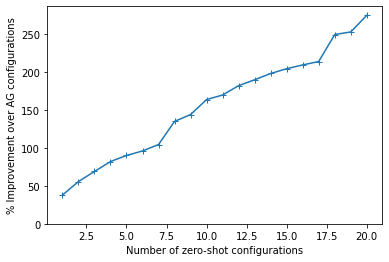

In [24]:
import matplotlib.pyplot as plt
improvements = []
for i in range(1, len(zs_configs)+1):
    avg_rank_zs = config_scorer.score(zs_configs[:i])
    improvement = (avg_rank_ag / avg_rank_zs - 1) * 100
    improvements.append(improvement)
plt.plot(range(1, len(zs_configs)+1), improvements, marker="+")
plt.xlabel("Number of zero-shot configurations")
plt.ylabel("% Improvement over AG configurations")
plt.ylim([0, None]);

In [25]:
# form (n_configuration, n_dataset) matrix
df_pivot_time_train_s = df_results_by_dataset_with_score_val.pivot_table(index='framework', columns='dataset', values=['time_train_s'])
avg_time_ag = df_pivot_time_train_s.loc[autogluon_configs]['time_train_s'].sum().mean()
avg_time_zeroshot = df_pivot_time_train_s.loc[zeroshot_configs]['time_train_s'].sum().mean()
print(f"average time autogluon/zeroshot configs: {avg_time_ag}/{avg_time_zeroshot}")

average time autogluon/zeroshot configs: 89.00145701567332/638.1293441546269


## Next steps (From David):
* obtain epoch or round metrics to evaluate ASHA
* reproduce analysis on other frameworks once data is available
* validate evaluation protocol to benchmark HPO:
    * what would be a reasonable number of configuration to be evaluated in total? (realistic for AG)
    * how many workers?
* clarify next steps in term of evaluations, I propose the following one
    * evaluate gain in AG if replace the current 4 config by zero-shot configurations
    * evaluate zero-shot + ASHA gain and wallclock time
    * if results are good, evaluate it in combination with AG HPO.

### Questions for Nick
* What is bestdiff?
  * N: The % lower relative error the best model in a given dataset has than this model.
    * A bestdiff of `0.2` for model A means that the oracle best model on each dataset has on average 20% lower relative error than model A.
        * Example: A has 90% accuracy, oracle best is expected to have 92% accuracy if bestdiff is `0.2`.
    * This is probably a better metric to optimize than loss rescaled, however it isn't perfect. It fails to appreciate quality differences when models are very weak, such as the difference between 50% accuracy and 52% accuracy. Mean-while it cares a lot about the difference between 99.99% and 99.999% accuracy.
* How is the loss rescaled?
  * N: best model = 0, worst model = 1, normalize rest between 0 and 1, separately for each dataset

You can refer to this code:

```
results_agg[BESTDIFF] = 1 - (results_agg['BEST_ERROR'] / results_agg[METRIC_ERROR])
results_agg[LOSS_RESCALED] = (results_agg[METRIC_ERROR] - results_agg['BEST_ERROR']) / (results_agg['WORST_ERROR'] - results_agg['BEST_ERROR'])
```


# Create new config based on ZS for AG

In [26]:
zeroshot_final = zeroshot_configs
zeroshot_final

['CatBoost_r62',
 'NeuralNetFastAI_r52',
 'CatBoost_r84',
 'LightGBM_r3',
 'LightGBM_r82',
 'NeuralNetFastAI_r4',
 'NeuralNetFastAI_r100',
 'CatBoost_r28',
 'NeuralNetFastAI_r73',
 'LightGBM_r27',
 'CatBoost_r24',
 'NeuralNetFastAI_r2',
 'LightGBM_r88',
 'NeuralNetFastAI_r10',
 'LightGBM_r7',
 'NeuralNetTorch_r14',
 'CatBoost_r86',
 'CatBoost_r56',
 'CatBoost_r69',
 'CatBoost_r30']

In [27]:
zeroshot_configs_dict = {config: configs_full[config] for config in zeroshot_final}
zeroshot_configs_dict

{'CatBoost_r62': {'hyperparameters': {'depth': 7,
   'l2_leaf_reg': 1.2023524602169489,
   'learning_rate': 0.01925381050368187,
   'ag_args': {'name_suffix': '_r62'}},
  'name_prefix': 'CatBoost',
  'name_suffix': '_r62',
  'model_type': 'CAT'},
 'NeuralNetFastAI_r52': {'hyperparameters': {'bs': 128,
   'emb_drop': 0.352237129196747,
   'epochs': 23,
   'layers': [200],
   'lr': 0.042935968821626626,
   'ps': 0.10243288109022286,
   'ag_args': {'name_suffix': '_r52'}},
  'name_prefix': 'NeuralNetFastAI',
  'name_suffix': '_r52',
  'model_type': 'FASTAI'},
 'CatBoost_r84': {'hyperparameters': {'depth': 5,
   'l2_leaf_reg': 4.490602621789581,
   'learning_rate': 0.013715156079130373,
   'ag_args': {'name_suffix': '_r84'}},
  'name_prefix': 'CatBoost',
  'name_suffix': '_r84',
  'model_type': 'CAT'},
 'LightGBM_r3': {'hyperparameters': {'extra_trees': False,
   'feature_fraction': 0.9872819661753602,
   'learning_rate': 0.02057151708150835,
   'min_data_in_leaf': 40,
   'num_leaves': 55,

In [28]:
from autogluon.common.savers import save_json
save_json.save(path='configs_zs_20221005.json', obj=zeroshot_configs_dict)

In [29]:
zeroshot_model_results = df_results[df_results['framework'].isin(zeroshot_final)]
zeroshot_model_results = zeroshot_model_results.set_index('framework', drop=True)
zeroshot_model_results = zeroshot_model_results.reindex(zeroshot_final)
zeroshot_model_results

,time_train_s,metric_error,time_infer_s,bestdiff,loss_rescaled,time_train_s_rescaled,time_infer_s_rescaled,rank,rank=1_count,rank=2_count,rank=3_count,rank>3_count,error_count
framework,,,,,,,,,,,,,
CatBoost_r62,65.203621,9.919136e+04,0.000787,0.204138,0.053674,89.730839,6.372296,127.961538,0,0,0,78,23
NeuralNetFastAI_r52,29.669489,3.767505e+06,0.003266,0.369487,0.153651,40.362771,20.506521,416.628205,0,0,0,78,3
CatBoost_r84,76.714686,9.937899e+04,0.000532,0.223004,0.055372,131.094885,3.367867,174.903846,0,0,0,78,24
LightGBM_r3,3.147420,9.749748e+04,0.000112,0.266056,0.084938,4.173896,11.176169,280.660256,0,0,0,78,2
LightGBM_r82,9.982551,9.747002e+04,0.000286,0.227960,0.065812,13.800472,64.271744,206.833333,1,0,0,77,8
NeuralNetFastAI_r4,43.687064,3.791393e+06,0.003194,0.365026,0.140614,59.844181,22.293182,390.294872,0,0,0,78,1
NeuralNetFastAI_r100,10.787574,4.183122e+05,0.003174,0.329712,0.121913,21.630579,15.440677,377.653846,1,1,1,75,5
CatBoost_r28,104.907733,9.854884e+04,0.001392,0.218318,0.059693,163.244205,19.147210,181.352564,2,0,0,76,18
NeuralNetFastAI_r73,16.732460,1.269843e+05,0.003159,0.323999,0.125196,26.664488,15.720962,349.128205,1,0,1,76,4


## Extra: Save zeroshot config simulated results for comparison

In [30]:
zeroshot_raw_df = config_scorer.get_configs_df(zeroshot_configs)
zeroshot_raw_df['tid'] = zeroshot_raw_df['dataset']
zeroshot_raw_df['model'] = zeroshot_raw_df['framework']
df_raw_zeroshot = df_raw.merge(zeroshot_raw_df[['tid', 'model']], on=['tid', 'model'])
df_raw_zeroshot['model'] = 'ALL_zs_v2_20'
df_raw_zeroshot['framework'] = 'ALL_zs_v2_20'
df_raw_zeroshot['framework_parent'] = ''

df_zs_train_time_s_per_dataset_ = df_pivot_time_train_s.loc[zeroshot_configs]['time_train_s'].sum()
df_zs_train_time_s_per_dataset_.name = 'time_train_s'
df_zs_train_time_s_per_dataset_ = df_zs_train_time_s_per_dataset_.rename_axis('tid')
df_zs_train_time_s_per_dataset_ = df_zs_train_time_s_per_dataset_.to_frame().reset_index(drop=False)

# TODO: Still not technically correct train_time_s, can optimize order of zero-shot training and report the earliest at which the score is generated
df_raw_zeroshot = df_raw_zeroshot.drop(columns=['time_train_s']).merge(df_zs_train_time_s_per_dataset_, on=['tid'])  # Get the correct train_time_s
df_raw_zeroshot

,app_version,can_infer,constraint,dataset,fit_order,fit_time,fit_time_marginal,fold,framework,framework_parent,...,pred_time_val_marginal,problem_type,score_val,seed,stack_level,tid,time_infer_s,utc,version,time_train_s
0,dev [https://github.com/Innixma/automlbenchmar...,True,8h8c,QSAR-TID-10980,7,4.374643,4.374643,0,ALL_zs_v2_20,,...,0.030094,regression,-0.734893,1845901875,1,360933.0,0.032156,2022-10-01T00:25:45,0.5.3b20221001,1623.656198
1,dev [https://github.com/Innixma/automlbenchmar...,True,8h8c,adult,31,2.270917,2.270917,0,ALL_zs_v2_20,,...,0.041496,binary,0.933433,1845901875,1,359983.0,0.100719,2022-10-01T00:24:54,0.5.3b20221001,653.846623
2,dev [https://github.com/Innixma/automlbenchmar...,True,8h8c,black_friday,31,10.443906,10.443906,0,ALL_zs_v2_20,,...,0.152517,regression,-3455.532987,1845901875,1,359937.0,1.002526,2022-10-01T00:45:29,0.5.3b20221001,2262.917752
3,dev [https://github.com/Innixma/automlbenchmar...,True,8h8c,first-order-theorem-proving,31,7.840176,7.840176,0,ALL_zs_v2_20,,...,0.016849,multiclass,-0.995912,1845901875,1,359969.0,0.047296,2022-10-01T00:35:29,0.5.3b20221001,779.922527
4,dev [https://github.com/Innixma/automlbenchmar...,True,8h8c,nomao,31,7.778834,7.778834,0,ALL_zs_v2_20,,...,0.066456,binary,0.996494,1845901875,1,359980.0,0.116796,2022-10-01T00:37:29,0.5.3b20221001,1997.806311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,dev [https://github.com/Innixma/automlbenchmar...,True,16h8c,sensory,10,2.329701,2.329701,0,ALL_zs_v2_20,,...,0.014323,regression,-0.711764,109327518,1,359931.0,0.013324,2022-10-02T22:45:15,0.5.3b20221002,27.781327
74,dev [https://github.com/Innixma/automlbenchmar...,True,16h8c,socmob,91,6.078165,6.078165,0,ALL_zs_v2_20,,...,0.018874,regression,-9.354880,109327518,1,359932.0,0.016880,2022-10-02T22:47:00,0.5.3b20221002,74.568880
75,dev [https://github.com/Innixma/automlbenchmar...,True,16h8c,tecator,91,1.385044,1.385044,0,ALL_zs_v2_20,,...,0.025120,regression,-0.839840,109327518,1,359934.0,0.025791,2022-10-02T22:45:23,0.5.3b20221002,333.716757
76,dev [https://github.com/Innixma/automlbenchmar...,True,16h8c,Australian,18,1.624574,1.624574,0,ALL_zs_v2_20,,...,0.011212,binary,0.943970,317688965,1,146818.0,0.011257,2022-10-02T23:07:17,0.5.3b20221002,23.283192


In [31]:
from autogluon.common.savers import save_pd
# Use this file to compare theoretical performance to AutoGluon in separate analysis repo
save_pd.save(path='zeroshot_all_v3_20.csv', df=df_raw_zeroshot)